## Random Sample Imputation

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare',"Survived"])

In [2]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,variable,median):
    df[variable+'_random']=df['Age']
    random=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    print(random)
    random.index=df[df['Age'].isnull()].index
    print(random.index)
    df.loc[df['Age'].isnull(),variable+'_random']=random

In [4]:
median=df.Age.median()

In [5]:
median

28.0

In [6]:
impute_nan(df,'Age',median)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64
Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)


In [7]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

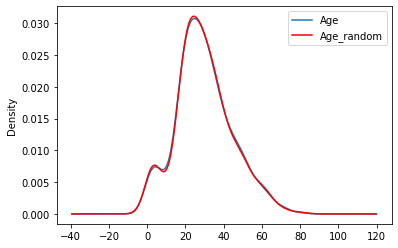

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages
Easy to implement
less distortion in variance
#### Disadvantages
In every situation randomness not work

## Capturing NAN value with a new feature

It works well whe data is not completely missing at random.

In [18]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare',"Survived"])

In [19]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [20]:
import numpy as np
df['Age_missing']=np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_missing
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [23]:
df.fillna(df.Age.median(),inplace=True)

In [24]:
df.head(10)

,Survived,Age,Fare,Age_missing
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
Easy to implement.

Captures the importance of missing value
#### Disadvantages
Create additional features(Curse of dimentionality)

## End of distribution imputation
It works well whe data is not completely missing at random.

Replace nan values with extreme,values beyond third standard deviation

In [63]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare',"Survived"])

In [64]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end']=df['Age'].fillna(extreme)
    df['Age']=df['Age'].fillna(median)

In [65]:
extreme=df['Age'].mean()+3*df['Age'].std()

In [66]:
extreme

73.27860964406095

In [67]:
impute_nan(df,'Age',df['Age'].median(),extreme)

In [68]:
df.head()

,Survived,Age,Fare,Age_end
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [69]:
import seaborn as sns

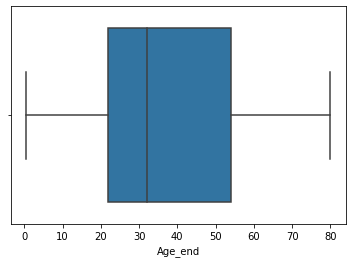

In [70]:
sns.boxplot('Age_end',data=df)

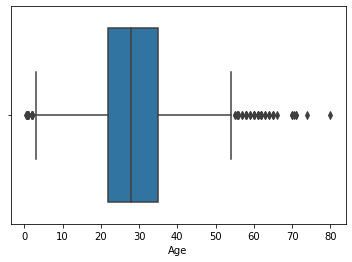

In [71]:
sns.boxplot('Age',data=df)

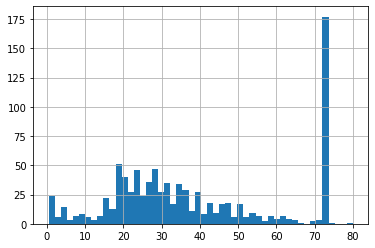

In [74]:
df['Age_end'].hist(bins=50)

### Arbitrary Value Imputation

It consist of replacing NAN value with arbitrary value.

In [2]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### replace nan value with greatest OR smallest outliar


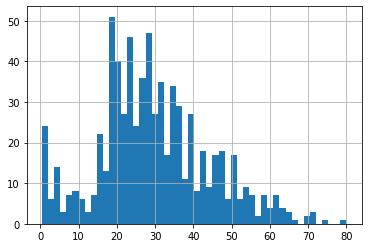

In [10]:
df['Age'].hist(bins=50)

In [11]:
df['Age_nan']=df['Age'].fillna(80)

In [12]:
df.head()

,Survived,Age,Fare,variable_nan,Age_nan
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
